In [1]:
# If you want to pip install inline uncomment the following:
!pip install pandas
!pip install pandas_datareader
!pip install mpl_finance
!pip install mplfinance
!pip install --upgrade mplfinance

# Import Packages
import bs4 as bs
import pickle
import requests
import datetime as dt
import os

import pandas as pd
from pandas import DataFrame
import pandas_datareader.data as web
#import pandas.plotting
from pandas.plotting import register_matplotlib_converters
#import pandas.testing
from pandas.testing import assert_frame_equal
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
from matplotlib import style

import mplfinance  
from mpl_finance import candlestick_ohlc # mpl_finance is deprecated - need to update visualizations  
from concurrent import futures

import collections
from collections import Counter

import sklearn
from sklearn import svm, neighbors
from sklearn.svm import LinearSVC 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, RandomForestClassifier

style.use('ggplot')

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: mplfinance in c:\users\jcw\appdata\roaming\python\python37\site-packages (0.12.6a3)


C:\Users\JCW\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
C:\Users\JCW\anaconda3\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


In [2]:
# Parts 1-3: Using Stock Market Data
# This example uses Tesla ($TSLA) stock data from 1/1/2000 to current date.
# df = pd.read_csv('c:/Users/JCW/Desktop/Stock_Market_Data_Analysis/Company Data/tsla.csv', parse_dates = True, index_col = 'Date')
start = dt.datetime(2000,1,1)
end = dt.datetime.now()
df = web.DataReader('TSLA', 'yahoo', start, end)

print(df.tail(10))

                   High          Low         Open        Close    Volume  \
Date                                                                       
2020-07-17  1537.510010  1490.000000  1513.449951  1500.839966   9330000   
2020-07-20  1650.000000  1488.000000  1519.010010  1643.000000  17121400   
2020-07-21  1675.000000  1558.000000  1639.930054  1568.359985  16157300   
2020-07-22  1626.420044  1562.000000  1599.000000  1592.329956  14161100   
2020-07-23  1689.000000  1480.770020  1678.949951  1513.069946  24328500   
2020-07-24  1465.000000  1366.540039  1416.010010  1417.000000  19396600   
2020-07-27  1547.939941  1413.000000  1435.000000  1539.599976  16048700   
2020-07-28  1564.699951  1474.420044  1504.000000  1476.489990  15808700   
2020-07-29  1534.810059  1487.000000  1501.000000  1499.109985   9409300   
2020-07-30  1513.000000  1471.000000  1488.000000  1500.770020   5931238   

              Adj Close  
Date                     
2020-07-17  1500.839966  
2020-07-2

In [3]:
# Read data into csv.
df = web.DataReader('TSLA', 'yahoo', start, end)
df.to_csv('tsla.csv')
df = pd.read_csv('tsla.csv', parse_dates = True, index_col = 'Date')

# Moving average over 100 day period. You can alter the window to average over 30 days, or another time period.
df['100ma'] = df['Adj Close'].rolling(window = 100, min_periods = 0).mean()
df.dropna(inplace = True)
print(df.tail())

                   High          Low        Open        Close    Volume  \
Date                                                                      
2020-07-24  1465.000000  1366.540039  1416.01001  1417.000000  19396600   
2020-07-27  1547.939941  1413.000000  1435.00000  1539.599976  16048700   
2020-07-28  1564.699951  1474.420044  1504.00000  1476.489990  15808700   
2020-07-29  1534.810059  1487.000000  1501.00000  1499.109985   9409300   
2020-07-30  1513.000000  1471.000000  1488.00000  1500.770020   5931359   

              Adj Close       100ma  
Date                                 
2020-07-24  1417.000000  866.227601  
2020-07-27  1539.599976  874.128601  
2020-07-28  1476.489990  881.648101  
2020-07-29  1499.109985  889.604401  
2020-07-30  1500.770020  898.532101  


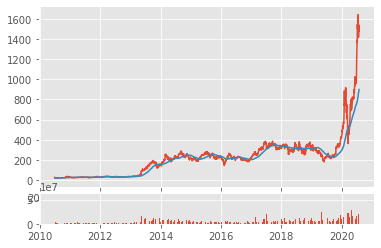

In [4]:
# Plot data using two plots (one for adjusted close price, one for volume).
ax1 = plt.subplot2grid((6,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan = 1, colspan = 1, sharex = ax1)

# Volume is shown in the subplot as a bar chart, and adj close is a line graph. Red is actual
# price, and blue is the 100 moving average.
ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])
plt.show()

In [5]:
df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()
df_ohlc.reset_index(inplace = True)
print(df_ohlc.head())

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)
print(df_ohlc.head())

        Date       open       high        low      close
0 2010-06-29  23.889999  23.889999  15.800000  17.459999
1 2010-07-09  17.400000  20.639999  17.049999  20.639999
2 2010-07-19  21.910000  21.910000  20.219999  20.719999
3 2010-07-29  20.350000  21.950001  19.590000  19.590000
4 2010-08-08  19.600000  19.600000  17.600000  19.150000
       Date       open       high        low      close
0  733952.0  23.889999  23.889999  15.800000  17.459999
1  733962.0  17.400000  20.639999  17.049999  20.639999
2  733972.0  21.910000  21.910000  20.219999  20.719999
3  733982.0  20.350000  21.950001  19.590000  19.590000
4  733992.0  19.600000  19.600000  17.600000  19.150000


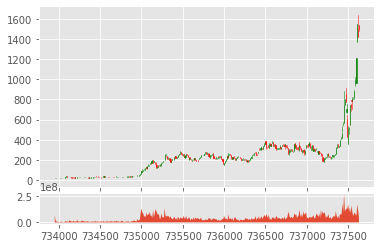

In [6]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan = 1, colspan = 1, sharex = ax1)

candlestick_ohlc(ax1, df_ohlc.values, width = 2, colorup = 'g')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)
plt.show()

                   High          Low         Open        Close    Volume  \
Date                                                                       
2020-07-17  1537.510010  1490.000000  1513.449951  1500.839966   9330000   
2020-07-20  1650.000000  1488.000000  1519.010010  1643.000000  17121400   
2020-07-21  1675.000000  1558.000000  1639.930054  1568.359985  16157300   
2020-07-22  1626.420044  1562.000000  1599.000000  1592.329956  14161100   
2020-07-23  1689.000000  1480.770020  1678.949951  1513.069946  24328500   
2020-07-24  1465.000000  1366.540039  1416.010010  1417.000000  19396600   
2020-07-27  1547.939941  1413.000000  1435.000000  1539.599976  16048700   
2020-07-28  1564.699951  1474.420044  1504.000000  1476.489990  15808700   
2020-07-29  1534.810059  1487.000000  1501.000000  1499.109985   9409300   
2020-07-30  1513.000000  1471.000000  1488.000000  1500.770020   5931359   

              Adj Close       100ma  
Date                                 
2020-07-17 

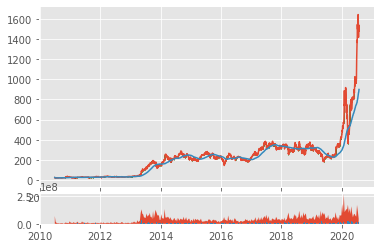

In [7]:
# Part 4: Resampling
# Here we are using a resampling method for the data sample to improve accuracy 
df = pd.read_csv('tsla.csv', parse_dates = True, index_col = 0)
df['100ma'] = df['Adj Close'].rolling(window = 100, min_periods = 0).mean()
print(df.tail(10))

df_ohlc = df['Adj Close'].resample('10D').mean()

# Resample data for 10 day period
df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()
df_ohlc.reset_index(inplace = True)

# Convert datetime object to mdate
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)
print(df_ohlc.head())

ax1 = plt.subplot2grid((6,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan = 1, colspan = 1, sharex = ax1)
ax1.xaxis_date()

candlestick_ohlc(ax1, df_ohlc.values, width = 3, colorup = 'g')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)
                 
ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])

plt.show()

In [8]:
# Part 5: Getting S&P500 List
# Here we are using BeautifulSoup to scrape data from wikipedia, and save the current S&P500 list.
def save_sp500_tickers():
    resp = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, "lxml")
    table = soup.find('table', {'id': 'constituents'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.find_all('td')[0].text.strip()
        tickers.append(ticker)

        #security = row.find_all('td')[1].text.strip()
        #tickers.append(security)

        #sector = row.find_all('td')[3].text.strip()
        #tickers.append(sector)

        #industry = row.find_all('td')[4].text.strip()
        #tickers.append(industry)

    with open("sp500tickers.pickle", "wb") as f:
        pickle.dump(tickers, f)

    print(tickers)

    return tickers

save_sp500_tickers()

['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AIV', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BKR', 'BLL', 'BAC', 'BK', 'BAX', 'BDX', 'BRK.B', 'BBY', 'BIO', 'BIIB', 'BLK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BF.B', 'CHRW', 'COG', 'CDNS', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'CXO', 'COP', 'ED', 'STZ', 'COO', 'CPRT', 'GLW', 'CTVA', 'COST', 'COTY', 'CCI', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA

['MMM',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALXN',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AIV',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BLL',
 'BAC',
 'BK',
 'BAX',
 'BDX',
 'BRK.B',
 'BBY',
 'BIO',
 'BIIB',
 'BLK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BF.B',
 'CHRW',
 'COG',
 'CDNS',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CTL',
 'CERN',
 'CF',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA',
 'CAG',
 'CXO'

In [9]:
# Part 6: Getting Stock Prices
# Get data from Yahoo and call SP500 tickers list as sp500
def get_data_from_yahoo(reload_sp500 = False):
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open("sp500tickers.pickle", "rb") as f:
            tickers = pickle.load(f)

# Take all of the data for stocks and store in a directory
# Working with API, parsing website, take entire dataset and store locally
# Here we will look at Adjusted Close, but we can look at other columns later
    if not os.path.exists('stock_dfs2'):
        os.makedirs('stock_dfs2')
    
    start = dt.datetime(2016,1,1)        
    end = dt.datetime.now()
    #end = dt.datetime(2020,7,24)

    # Grab all ticker data
    for ticker in tickers:
        print(ticker)    
        if not os.path.exists('stock_dfs2/{}.csv'.format(ticker)):
            try:
                df = web.DataReader(ticker, 'yahoo', start, end)
                df.to_csv('stock_dfs2/{}.csv'.format(ticker))
            except:
                print(f'Problems retrieving data for {ticker}. Skipping!')
            else:
                print('Already have {}'.format(ticker))

get_data_from_yahoo()

MMM
ABT
ABBV
ABMD
ACN
ATVI
ADBE
AMD
AAP
AES
AFL
A
APD
AKAM
ALK
ALB
ARE
ALXN
ALGN
ALLE
LNT
ALL
GOOGL
GOOG
MO
AMZN
AMCR
AEE
AAL
AEP
AXP
AIG
AMT
AWK
AMP
ABC
AME
AMGN
APH
ADI
ANSS
ANTM
AON
AOS
APA
AIV
AAPL
AMAT
APTV
ADM
ANET
AJG
AIZ
T
ATO
ADSK
ADP
AZO
AVB
AVY
BKR
BLL
BAC
BK
BAX
BDX
BRK.B
Problems retrieving data for BRK.B. Skipping!
BBY
BIO
BIIB
BLK
BA
BKNG
BWA
BXP
BSX
BMY
AVGO
BR
BF.B
Problems retrieving data for BF.B. Skipping!
CHRW
COG
CDNS
CPB
COF
CAH
KMX
CCL
CARR
CAT
CBOE
CBRE
CDW
CE
CNC
CNP
CTL
CERN
CF
SCHW
CHTR
CVX
CMG
CB
CHD
CI
Already have CI
CINF
CTAS
CSCO
C
CFG
CTXS
CLX
CME
CMS
KO
CTSH
CL
CMCSA
CMA
CAG
CXO
COP
ED
STZ
COO
CPRT
GLW
CTVA
COST
COTY
CCI
CSX
CMI
CVS
DHI
DHR
DRI
DVA
DE
DAL
XRAY
DVN
DXCM
FANG
DLR
DFS
DISCA
DISCK
DISH
DG
DLTR
D
DPZ
DOV
DOW
DTE
DUK
DRE
DD
DXC
ETFC
EMN
ETN
EBAY
ECL
EIX
EW
EA
EMR
ETR
EOG
EFX
EQIX
EQR
ESS
EL
EVRG
ES
RE
EXC
EXPE
EXPD
EXR
XOM
FFIV
FB
FAST
FRT
FDX
FIS
FITB
FE
FRC
FISV
FLT
FLIR
FLS
FMC
F
FTNT
FTV
FBHS
FOXA
FOX
BEN
FCX
GPS
GRMN
IT
GD
GE
GIS
GM
GP

In [10]:
# Part 7: Combine S&P500 List with Adjusted Close Price for All Companies
def compile_data():
    with open("sp500tickers.pickle", "rb") as f:
        tickers = pickle.load(f)
    mainDataSet = pd.DataFrame()

# Count in SP500 tickers list
    for count, ticker in enumerate(tickers):
        fileDataSet = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
        fileDataSet.set_index('Date', inplace = True)
        fileDataSet.rename(columns = {'Adj Close':ticker}, inplace = True)
        fileDataSet.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace = True)

        if mainDataSet.empty:
            mainDataSet = fileDataSet
        else:
            mainDataSet = mainDataSet.join(fileDataSet)
        print(mainDataSet.head())
    mainDataSet.to_csv('sp500_joined_closes.csv')
compile_data()  

                  MMM
Date                 
2000-01-03  28.311874
2000-01-04  27.186905
2000-01-05  27.974379
2000-01-06  30.224340
2000-01-07  30.824324
                  MMM       ABT
Date                           
2000-01-03  28.311874  6.564564
2000-01-04  27.186905  6.377004
2000-01-05  27.974379  6.365284
2000-01-06  30.224340  6.588011
2000-01-07  30.824324  6.658342
                  MMM       ABT  ABBV
Date                                 
2000-01-03  28.311874  6.564564   NaN
2000-01-04  27.186905  6.377004   NaN
2000-01-05  27.974379  6.365284   NaN
2000-01-06  30.224340  6.588011   NaN
2000-01-07  30.824324  6.658342   NaN
                  MMM       ABT  ABBV      ABMD
Date                                           
2000-01-03  28.311874  6.564564   NaN  18.25000
2000-01-04  27.186905  6.377004   NaN  17.81250
2000-01-05  27.974379  6.365284   NaN  18.00000
2000-01-06  30.224340  6.588011   NaN  18.03125
2000-01-07  30.824324  6.658342   NaN  17.93750
                  MM

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES       AFL          A        APD     AKAM  \
Date                                                                          
2000-01-03  15.500  NaN  28.294199  5.336146  44.777622  18.104057  321.250   
2000-01-04  14.625  NaN  27.172190  5.194542  41.357113  17.552309  300.000   
2000-01-05  15.000  NaN  27.464891  5.164732  38.791721  17.655748  283.500   
2000-01-06  16.000  NaN  27.684412  5.269069  37.314693  18.82821

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        APD     AKAM       ALK  \
Date                                ...                                 
2000-01-03  15.500  NaN  28.294199  ...  18.104057  321.250  7.803120   
2000-01-04  14.625  NaN  27.172190  ...  17.552309  300.000  7.705581   
2000-01-05  15.000  NaN  27.464891  ...  17.655748  283.500  7.747382   
2000-01-06  16.000  NaN  27.684412  ...  18.828213  236.125  7.754352   
2000-01-07  16.250  Na

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  ALLE       LNT        ALL  GOOGL  \
Date                                ...                                     
2000-01-03  15.500  NaN  28.294199  ...   NaN  5.336293  14.409927    NaN   
2000-01-04  14.625  NaN  27.172190  ...   NaN  5.336293  13.950034    NaN   
2000-01-05  15.000  NaN  27.464891  ...   NaN  5.597509  14.563220    NaN   
2000-01-06  16.000  NaN  27.684412  ...   NaN  5.597509  14.486568    NaN  

[5 rows x 37 columns]
                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  AAL        AEP        AXP  \
Date                                ...                              
2000-01-03  15.500  NaN  28.294199  ...  NaN  12.473226  34.196667   
2000-01-04  14.625  NaN  27.172190  ...  NaN  12.622015  32.905453   
2000-01-05  15.000  NaN  27.464891  ...  NaN  13.093165  32.186031   
2000-01-06  16.000  NaN  27.684412  ...  NaN  13.167562  32.841770   
2000-01-07  16.250

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  AMP       ABC       AME       AMGN  \
Date                                ...                                       
2000-01-03  15.500  NaN  28.294199  ...  NaN  3.107706  1.857676  50.853237   
2000-01-04  14.625  NaN  27.172190  ...  NaN  2.895534  1.851566  46.964756   
2000-01-05  15.000  NaN  27.464891  ...  NaN  3.120188  1.869898  48.580750   
2000-01-06  16.000  NaN  27.684412  ...  NaN  3.357322  1.857676 

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        ADI      ANSS  ANTM        AON  \
Date                                ...                                         
2000-01-03  15.500  NaN  28.294199  ...  30.618002  2.765625   NaN  27.607428   
2000-01-04  14.625  NaN  27.172190  ...  29.069048  2.687500   NaN  26.988020   
2000-01-05  15.000  NaN  27.464891  ...  29.493437  2.703125   NaN  27.784399   
2000-01-06  16.000  NaN  27.684412  ...  28.687130  2.7

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        AIV      AAPL       AMAT  APTV  \
Date                                ...                                         
2000-01-03  15.500  NaN  28.294199  ...  10.057044  3.460857  24.005121   NaN   
2000-01-04  14.625  NaN  27.172190  ...   9.924721  3.169071  22.819094   NaN   
2000-01-05  15.000  NaN  27.464891  ...  10.023967  3.215448  21.965160   NaN   
2000-01-06  16.000  NaN  27.684412  ...  10.222464  2.9

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...       AJG  AIZ          T       ATO  \
Date                                ...                                       
2000-01-03  15.500  NaN  28.294199  ...  7.951206  NaN  17.282593  8.780582   
2000-01-04  14.625  NaN  27.172190  ...  7.591920  NaN  16.271378  8.561753   
2000-01-05  15.000  NaN  27.464891  ...  7.623160  NaN  16.524181  8.835291   
2000-01-06  16.000  NaN  27.684412  ...  7.609494  NaN  16.175280

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        AVB        AVY        BKR  \
Date                                ...                                    
2000-01-03  15.500  NaN  28.294199  ...  15.067223  41.993992  10.526615   
2000-01-04  14.625  NaN  27.172190  ...  14.734252  41.442417  10.526615   
2000-01-05  15.000  NaN  27.464891  ...  14.872992  42.802998  10.591587   
2000-01-06  16.000  NaN  27.684412  ...  15.372456  44.310669  11.598760   
2000

[5 rows x 72 columns]
                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...         BK        BAX        BDX  \
Date                                ...                                    
2000-01-03  15.500  NaN  28.294199  ...  25.558714  11.154243  19.089441   
2000-01-04  14.625  NaN  27.172190  ...  24.824766  10.904355  18.588293   
2000-01-05  15.000  NaN  27.464891  ...  24.263496  11.381418  18.724966   
2000-01-06  16.000  NaN  27.684412  ...  24.867937  11.619

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...         BA     BKNG       BWA  \
Date                                ...                                 
2000-01-03  15.500  NaN  28.294199  ...  25.741438  307.500  2.292869   
2000-01-04  14.625  NaN  27.172190  ...  25.701408  324.000  2.292869   
2000-01-05  15.000  NaN  27.464891  ...  27.302753  359.625  2.303982   
2000-01-06  16.000  NaN  27.684412  ...  27.582977  345.000  2.274348   
2000-01-07  16.250  Na

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...      BF.B      CHRW       COG  \
Date                                ...                                 
2000-01-03  15.500  NaN  28.294199  ...  1.056217  6.855355  0.686059   
2000-01-04  14.625  NaN  27.172190  ...  1.036743  6.625382  0.665796   
2000-01-05  15.000  NaN  27.464891  ...  1.044762  6.537773  0.677375   
2000-01-06  16.000  NaN  27.684412  ...  1.051635  6.570628  0.691849   
2000-01-07  16.250  Na

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        CCL  CARR        CAT  CBOE  \
Date                                ...                                     
2000-01-03  15.500  NaN  28.294199  ...  28.484207   NaN  11.845388   NaN   
2000-01-04  14.625  NaN  27.172190  ...  28.142393   NaN  11.693136   NaN   
2000-01-05  15.000  NaN  27.464891  ...  29.091873   NaN  11.967190   NaN   
2000-01-06  16.000  NaN  27.684412  ...  29.509623   NaN  12.576205   NaN  

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  CNC       CNP        CTL      CERN  \
Date                                ...                                       
2000-01-03  15.500  NaN  28.294199  ...  NaN  6.079404  16.096891  2.527873   
2000-01-04  14.625  NaN  27.172190  ...  NaN  6.147709  15.452129  2.481490   
2000-01-05  15.000  NaN  27.464891  ...  NaN  6.403867  15.563292  2.481490   
2000-01-06  16.000  NaN  27.684412  ...  NaN  6.438023  15.385429

[5 rows x 112 columns]
                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        CB       CHD         CI  \
Date                                ...                                  
2000-01-03  15.500  NaN  28.294199  ...  7.325750  3.303076  23.584595   
2000-01-04  14.625  NaN  27.172190  ...  7.269614  3.223673  23.490625   
2000-01-05  15.000  NaN  27.464891  ...  6.848598  3.223673  23.396673   
2000-01-06  16.000  NaN  27.684412  ...  7.213480  3.334835  24.524

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...           C  CFG       CTXS  \
Date                                ...                               
2000-01-03  15.500  NaN  28.294199  ...  326.904785  NaN  49.982899   
2000-01-04  14.625  NaN  27.172190  ...  306.858734  NaN  47.520329   
2000-01-05  15.000  NaN  27.464891  ...  319.194885  NaN  44.789551   
2000-01-06  16.000  NaN  27.684412  ...  334.614807  NaN  40.961594   
2000-01-07  16.250  NaN  28.221029

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...         KO      CTSH         CL  \
Date                                ...                                   
2000-01-03  15.500  NaN  28.294199  ...  12.015392  1.922517  20.230127   
2000-01-04  14.625  NaN  27.172190  ...  12.028710  1.857432  19.702030   
2000-01-05  15.000  NaN  27.464891  ...  12.135282  1.960066  19.031754   
2000-01-06  16.000  NaN  27.684412  ...  12.148600  1.859935  18.991133   
2000-01-07

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  CXO       COP         ED       STZ  \
Date                                ...                                       
2000-01-03  15.500  NaN  28.294199  ...  NaN  6.827606  12.767960  5.836346   
2000-01-04  14.625  NaN  27.172190  ...  NaN  6.695764  12.933472  5.616660   
2000-01-05  15.000  NaN  27.464891  ...  NaN  6.573339  13.524576  5.807055   
2000-01-06  16.000  NaN  27.684412  ...  NaN  6.799354  13.548223

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...       COST  COTY        CCI       CSX  \
Date                                ...                                         
2000-01-03  15.500  NaN  28.294199  ...  32.375179   NaN  24.362835  3.501594   
2000-01-04  14.625  NaN  27.172190  ...  30.601828   NaN  24.337896  3.395484   
2000-01-05  15.000  NaN  27.464891  ...  31.124743   NaN  23.988785  3.466223   
2000-01-06  16.000  NaN  27.684412  ...  31.749947   Na

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...       DHR       DRI       DVA  \
Date                                ...                                 
2000-01-03  15.500  NaN  28.294199  ...  5.401667  6.254695  2.291667   
2000-01-04  14.625  NaN  27.172190  ...  5.205636  6.209535  2.250000   
2000-01-05  15.000  NaN  27.464891  ...  5.263720  6.435337  2.062500   
2000-01-06  16.000  NaN  27.684412  ...  5.321804  6.367594  2.000000   
2000-01-07  16.250  Na

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  FANG  DLR  DFS  DISCA  DISCK  \
Date                                ...                                 
2000-01-03  15.500  NaN  28.294199  ...   NaN  NaN  NaN    NaN    NaN   
2000-01-04  14.625  NaN  27.172190  ...   NaN  NaN  NaN    NaN    NaN   
2000-01-05  15.000  NaN  27.464891  ...   NaN  NaN  NaN    NaN    NaN   
2000-01-06  16.000  NaN  27.684412  ...   NaN  NaN  NaN    NaN    NaN   
2000-01-07  16.250  Na

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...       DLTR         D  DPZ        DOV  \
Date                                ...                                        
2000-01-03  15.500  NaN  28.294199  ...  10.861111  5.982473  NaN  17.053835   
2000-01-04  14.625  NaN  27.172190  ...  10.847222  6.129583  NaN  16.738024   
2000-01-05  15.000  NaN  27.464891  ...  10.861111  6.296309  NaN  16.810896   
2000-01-06  16.000  NaN  27.684412  ...  11.055555  6.364962

[5 rows x 166 columns]
                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        DUK       DRE         DD  \
Date                                ...                                   
2000-01-03  15.500  NaN  28.294199  ...  21.758743  6.057658  37.837978   
2000-01-04  14.625  NaN  27.172190  ...  22.096954  6.017806  36.803764   
2000-01-05  15.000  NaN  27.464891  ...  22.998890  6.037733  37.998447   
2000-01-06  16.000  NaN  27.684412  ...  23.618952  6.177219  

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...       ETN      EBAY        ECL  \
Date                                ...                                  
2000-01-03  15.500  NaN  28.294199  ...  2.688206  7.287086  14.673091   
2000-01-04  14.625  NaN  27.172190  ...  2.596401  6.603519  14.283750   
2000-01-05  15.000  NaN  27.464891  ...  2.617585  7.045258  14.843422   
2000-01-06  16.000  NaN  27.684412  ...  2.671727  6.958200  15.500422   
2000-01-07  16.2

[5 rows x 179 columns]
                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        ETR  EOG        EFX  EQIX  \
Date                                ...                                    
2000-01-03  15.500  NaN  28.294199  ...  11.400367  NaN  10.907270   NaN   
2000-01-04  14.625  NaN  27.172190  ...  11.428587  NaN  10.541660   NaN   
2000-01-05  15.000  NaN  27.464891  ...  11.908303  NaN  10.419790   NaN   
2000-01-06  16.000  NaN  27.684412  ...  11.682555  NaN  

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...         EL      EVRG         ES  \
Date                                ...                                   
2000-01-03  15.500  NaN  28.294199  ...  17.446737  6.292474  10.760827   
2000-01-04  14.625  NaN  27.172190  ...  17.138727  6.506991  10.760827   
2000-01-05  15.000  NaN  27.464891  ...  16.561195  6.840682  10.825849   
2000-01-06  16.000  NaN  27.684412  ...  17.050722  6.793015  10.955889   
2000-01-07

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  EXR        XOM      FFIV  FB  \
Date                                ...                                 
2000-01-03  15.500  NaN  28.294199  ...  NaN  21.139345  59.75000 NaN   
2000-01-04  14.625  NaN  27.172190  ...  NaN  20.734442  58.96875 NaN   
2000-01-05  15.000  NaN  27.464891  ...  NaN  21.864794  55.40625 NaN   
2000-01-06  16.000  NaN  27.684412  ...  NaN  22.995153  51.06250 NaN   
2000-01-07  16.250  Na

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        FDX  FIS       FITB        FE  \
Date                                ...                                        
2000-01-03  15.500  NaN  28.294199  ...  38.223751  NaN  27.507853  8.814839   
2000-01-04  14.625  NaN  27.172190  ...  36.944042  NaN  26.351439  8.814839   
2000-01-05  15.000  NaN  27.464891  ...  37.778625  NaN  25.957760  9.139463   
2000-01-06  16.000  NaN  27.684412  ...  42.062809  NaN  26.

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...      FLIR       FLS       FMC  \
Date                                ...                                 
2000-01-03  15.500  NaN  28.294199  ...  1.847155  4.583350  4.771420   
2000-01-04  14.625  NaN  27.172190  ...  1.702415  4.496214  4.711777   
2000-01-05  15.000  NaN  27.464891  ...  1.792016  4.565925  4.798528   
2000-01-06  16.000  NaN  27.684412  ...  1.778232  4.583350  4.793107   
2000-01-07  16.250  Na

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  FBHS  FOXA  FOX       BEN       FCX  \
Date                                ...                                        
2000-01-03  15.500  NaN  28.294199  ...   NaN   NaN  NaN  6.348482  5.760734   
2000-01-04  14.625  NaN  27.172190  ...   NaN   NaN  NaN  6.235785  5.437866   
2000-01-05  15.000  NaN  27.464891  ...   NaN   NaN  NaN  6.335961  5.641784   
2000-01-06  16.000  NaN  27.684412  ...   NaN   NaN  NaN  6.

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...      IT         GD         GE  \
Date                                ...                                 
2000-01-03  15.500  NaN  28.294199  ...  16.625  16.108694  25.534224   
2000-01-04  14.625  NaN  27.172190  ...  15.375  16.785870  24.512873   
2000-01-05  15.000  NaN  27.464891  ...  14.750  17.935028  24.470304   
2000-01-06  16.000  NaN  27.684412  ...  14.750  17.996588  24.797457   
2000-01-07  16.250  Na

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        GL  GPN         GS        GWW  \
Date                                ...                                        
2000-01-03  15.500  NaN  28.294199  ...  8.717456  NaN  70.332672  31.934031   
2000-01-04  14.625  NaN  27.172190  ...  8.544263  NaN  65.902657  31.021645   
2000-01-05  15.000  NaN  27.464891  ...  8.607070  NaN  62.816559  31.456114   
2000-01-06  16.000  NaN  27.684412  ...  8.587687  NaN  65.5

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  HBI        HIG        HAS  HCA  \
Date                                ...                                   
2000-01-03  15.500  NaN  28.294199  ...  NaN  29.600504  11.565478  NaN   
2000-01-04  14.625  NaN  27.172190  ...  NaN  28.619247  10.820583  NaN   
2000-01-05  15.000  NaN  27.464891  ...  NaN  27.760685  10.310920  NaN   
2000-01-06  16.000  NaN  27.684412  ...  NaN  28.005995  10.036487  NaN   
2000-01-07

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        HES  HPE  HLT       HFC  \
Date                                ...                                  
2000-01-03  15.500  NaN  28.294199  ...  11.411185  NaN  NaN  0.082275   
2000-01-04  14.625  NaN  27.172190  ...  11.188725  NaN  NaN  0.083030   
2000-01-05  15.000  NaN  27.464891  ...  11.097116  NaN  NaN  0.084162   
2000-01-06  16.000  NaN  27.684412  ...  11.332666  NaN  NaN  0.083030   
2000-01-07  16.2

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        HON       HRL       HST  HWM  \
Date                                ...                                       
2000-01-03  15.500  NaN  28.294199  ...  33.049091  1.643118  4.358634  NaN   
2000-01-04  14.625  NaN  27.172190  ...  32.466099  1.620156  4.326347  NaN   
2000-01-05  15.000  NaN  27.464891  ...  32.028824  1.645669  4.164915  NaN   
2000-01-06  16.000  NaN  27.684412  ...  32.648270  1.673735  4.2

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...       IEX      IDXX  INFO        ITW  \
Date                                ...                                        
2000-01-03  15.500  NaN  28.294199  ...  8.660472  4.015625   NaN  19.242121   
2000-01-04  14.625  NaN  27.172190  ...  8.265998  3.656250   NaN  18.376034   
2000-01-05  15.000  NaN  27.464891  ...  8.230138  3.765625   NaN  18.601973   
2000-01-06  16.000  NaN  27.684412  ...  8.230138  3.750000 

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  IR       INTC  ICE        IBM  \
Date                                ...                                  
2000-01-03  15.500  NaN  28.294199  ... NaN  27.719835  NaN  74.620827   
2000-01-04  14.625  NaN  27.172190  ... NaN  26.425453  NaN  72.087906   
2000-01-05  15.000  NaN  27.464891  ... NaN  26.644501  NaN  74.620827   
2000-01-06  16.000  NaN  27.684412  ... NaN  25.091228  NaN  73.334274   
2000-01-07  16.2

[5 rows x 264 columns]
                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        IFF       INTU  ISRG  \
Date                                ...                               
2000-01-03  15.500  NaN  28.294199  ...  22.768127  27.455267   NaN   
2000-01-04  14.625  NaN  27.172190  ...  22.488022  27.740072   NaN   
2000-01-05  15.000  NaN  27.464891  ...  22.688107  35.743107   NaN   
2000-01-06  16.000  NaN  27.684412  ...  23.208284  31.898235   NaN   
2000-01-07 

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...       JKHY         J      JBHT  \
Date                                ...                                  
2000-01-03  15.500  NaN  28.294199  ...  10.634753  7.726096  2.795751   
2000-01-04  14.625  NaN  27.172190  ...   9.769133  7.680737  2.652712   
2000-01-05  15.000  NaN  27.464891  ...   9.966991  7.726096  2.678720   
2000-01-06  16.000  NaN  27.684412  ...   9.868058  7.763896  2.756741   
2000-01-07  16.2

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...       JNPR        KSU          K  \
Date                                ...                                    
2000-01-03  15.500  NaN  28.294199  ...  50.860447  65.806404  16.248468   
2000-01-04  14.625  NaN  27.172190  ...  48.624214  62.422760  15.670599   
2000-01-05  15.000  NaN  27.464891  ...  48.254581  60.497585  15.534624   
2000-01-06  16.000  NaN  27.684412  ...  46.129246  62.422760  15.670599   
2000

[5 rows x 287 columns]
                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        KSS  KHC        KR        LB  \
Date                                ...                                       
2000-01-03  15.500  NaN  28.294199  ...  23.710402  NaN  6.489871  7.874387   
2000-01-04  14.625  NaN  27.172190  ...  23.428648  NaN  6.704060  7.716657   
2000-01-05  15.000  NaN  27.464891  ...  23.753748  NaN  6.811152  7.607459   
2000-01-06  16.000  NaN  27.684412  ...  2

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  LVS        LEG  LDOS       LEN  \
Date                                ...                                   
2000-01-03  15.500  NaN  28.294199  ...  NaN  10.075068   NaN  5.978436   
2000-01-04  14.625  NaN  27.172190  ...  NaN   9.554474   NaN  5.931546   
2000-01-05  15.000  NaN  27.464891  ...  NaN   9.554474   NaN  5.954991   
2000-01-06  16.000  NaN  27.684412  ...  NaN   9.523849   NaN  5.954991   
2000-01-07

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  LYV  LKQ        LMT         L  \
Date                                ...                                  
2000-01-03  15.500  NaN  28.294199  ...  NaN  NaN  12.144202  8.329817   
2000-01-04  14.625  NaN  27.172190  ...  NaN  NaN  12.556508  8.276928   
2000-01-05  15.000  NaN  27.464891  ...  NaN  NaN  12.631470  8.224044   
2000-01-06  16.000  NaN  27.684412  ...  NaN  NaN  12.818884  8.171153   
2000-01-07  16.2

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        MTB       MRO  MPC  MKTX  \
Date                                ...                                   
2000-01-03  15.500  NaN  28.294199  ...  24.819506  2.399103  NaN   NaN   
2000-01-04  14.625  NaN  27.172190  ...  24.022083  2.306355  NaN   NaN   
2000-01-05  15.000  NaN  27.464891  ...  24.128908  2.368186  NaN   NaN   
2000-01-06  16.000  NaN  27.684412  ...  24.411247  2.621700  NaN   NaN   
2000-01-07

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        MMC        MLM        MAS  MA  \
Date                                ...                                        
2000-01-03  15.500  NaN  28.294199  ...  26.990477  30.544085  12.996982 NaN   
2000-01-04  14.625  NaN  27.172190  ...  25.777422  30.119860  12.674477 NaN   
2000-01-05  15.000  NaN  27.464891  ...  24.849794  31.675343  12.161582 NaN   
2000-01-06  16.000  NaN  27.684412  ...  26.659546  34.03215

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        MDT        MRK  MET     MTD  \
Date                                ...                                      
2000-01-03  15.500  NaN  28.294199  ...  24.943438  31.689192  NaN  35.375   
2000-01-04  14.625  NaN  27.172190  ...  25.125523  30.576269  NaN  34.625   
2000-01-05  15.000  NaN  27.464891  ...  26.704069  31.777040  NaN  33.875   
2000-01-06  16.000  NaN  27.684412  ...  27.706591  32.040642  NaN  34

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...       MSFT       MAA      MHK  \
Date                                ...                                 
2000-01-03  15.500  NaN  28.294199  ...  37.289700  7.268247  24.5625   
2000-01-04  14.625  NaN  27.172190  ...  36.030037  7.308624  24.0000   
2000-01-05  15.000  NaN  27.464891  ...  36.409924  7.227864  24.4375   
2000-01-06  16.000  NaN  27.684412  ...  35.190277  7.349001  24.3125   
2000-01-07  16.250  Na

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...       MCO         MS        MOS  \
Date                                ...                                   
2000-01-03  15.500  NaN  28.294199  ...  8.182575  38.990582  13.199550   
2000-01-04  14.625  NaN  27.172190  ...  7.946084  36.102390  12.904040   
2000-01-05  15.000  NaN  27.464891  ...  7.804188  34.784649  13.396564   
2000-01-06  16.000  NaN  27.684412  ...  7.804188  35.452534  13.593571   
2000-01-07

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  NDAQ       NOV       NTAP  NFLX  \
Date                                ...                                    
2000-01-03  15.500  NaN  28.294199  ...   NaN  5.681176  36.342716   NaN   
2000-01-04  14.625  NaN  27.172190  ...   NaN  5.535507  31.746449   NaN   
2000-01-05  15.000  NaN  27.464891  ...   NaN  5.632619  33.510132   NaN   
2000-01-06  16.000  NaN  27.684412  ...   NaN  5.851126  29.956018   NaN   
2000

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  NWSA  NWS       NEE  NLSN       NKE  \
Date                                ...                                        
2000-01-03  15.500  NaN  28.294199  ...   NaN  NaN  8.322881   NaN  1.819597   
2000-01-04  14.625  NaN  27.172190  ...   NaN  NaN  8.474204   NaN  1.720346   
2000-01-05  15.000  NaN  27.464891  ...   NaN  NaN  8.751637   NaN  1.819597   
2000-01-06  16.000  NaN  27.684412  ...   NaN  NaN  8.751637

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        NSC       NTRS        NOC  \
Date                                ...                                    
2000-01-03  15.500  NaN  28.294199  ...  12.738764  34.062267  13.660627   
2000-01-04  14.625  NaN  27.172190  ...  12.817889  31.847679  13.838248   
2000-01-05  15.000  NaN  27.464891  ...  12.738764  32.564785  13.822094   
2000-01-06  16.000  NaN  27.684412  ...  13.490429  33.239700  13.563735   
2000

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...       NUE      NVDA      NVR  \
Date                                ...                                
2000-01-03  15.500  NaN  28.294199  ...  6.318145  3.590438  46.5625   
2000-01-04  14.625  NaN  27.172190  ...  6.252708  3.494565  46.0000   
2000-01-05  15.000  NaN  27.464891  ...  6.427203  3.379518  45.8750   
2000-01-06  16.000  NaN  27.684412  ...  6.485368  3.159011  45.8750   
2000-01-07  16.250  NaN  28.

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        OMC       OKE       ORCL  OTIS  \
Date                                ...                                         
2000-01-03  15.500  NaN  28.294199  ...  29.950857  1.100867  25.591290   NaN   
2000-01-04  14.625  NaN  27.172190  ...  28.965408  1.087002  23.330050   NaN   
2000-01-05  15.000  NaN  27.464891  ...  28.134499  1.098094  22.097868   NaN   
2000-01-06  16.000  NaN  27.684412  ...  28.289080  1.0

[5 rows x 373 columns]
                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  PAYC  PYPL       PNR      PBCT  \
Date                                ...                                   
2000-01-03  15.500  NaN  28.294199  ...   NaN   NaN  5.890952  1.810835   
2000-01-04  14.625  NaN  27.172190  ...   NaN   NaN  5.799384  1.805414   
2000-01-05  15.000  NaN  27.464891  ...   NaN   NaN  5.890952  1.816257   
2000-01-06  16.000  NaN  27.684412  ...   NaN   NaN  5.860430 

[5 rows x 380 columns]
                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        PFE  PM  PSX        PNW  \
Date                                ...                                  
2000-01-03  15.500  NaN  28.294199  ...  16.010798 NaN  NaN  12.105463   
2000-01-04  14.625  NaN  27.172190  ...  15.414313 NaN  NaN  12.258056   
2000-01-05  15.000  NaN  27.464891  ...  15.665458 NaN  NaN  12.588662   
2000-01-06  16.000  NaN  27.684412  ...  16.230549 NaN  NaN  12.664

[5 rows x 387 columns]
                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...       PPL  PFG         PG       PGR  \
Date                                ...                                       
2000-01-03  15.500  NaN  28.294199  ...  3.395812  NaN  28.391300  3.510027   
2000-01-04  14.625  NaN  27.172190  ...  3.481903  NaN  27.844984  3.382783   
2000-01-05  15.000  NaN  27.464891  ...  3.558429  NaN  27.315243  3.463474   
2000-01-06  16.000  NaN  27.684412  ...  3

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        PSA       PHM       PVH  QRVO  \
Date                                ...                                        
2000-01-03  15.500  NaN  28.294199  ...  10.998557  4.288374  7.058062   NaN   
2000-01-04  14.625  NaN  27.172190  ...  10.998557  4.085377  6.775739   NaN   
2000-01-05  15.000  NaN  27.464891  ...  11.089203  4.009250  6.662811   NaN   
2000-01-06  16.000  NaN  27.684412  ...  11.512227  3.983874

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...       QCOM       DGX         RL  \
Date                                ...                                   
2000-01-03  15.500  NaN  28.294199  ...  62.936359  5.849173  14.462232   
2000-01-04  14.625  NaN  27.172190  ...  56.881840  5.836986  13.892036   
2000-01-05  15.000  NaN  27.464891  ...  54.907513  5.788244  14.151213   
2000-01-06  16.000  NaN  27.684412  ...  49.160114  5.812618  14.151213   
2000-01-07

[5 rows x 406 columns]
                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...     REGN         RF       RSG  \
Date                                ...                                 
2000-01-03  15.500  NaN  28.294199  ...  12.3125  10.150783  6.369450   
2000-01-04  14.625  NaN  27.172190  ...  12.0000   9.853820  5.974884   
2000-01-05  15.000  NaN  27.464891  ...  11.5000   9.799825  5.862149   
2000-01-06  16.000  NaN  27.684412  ...  11.6250   9.826822  5.833966   

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        ROK       ROL        ROP  \
Date                                ...                                   
2000-01-03  15.500  NaN  28.294199  ...  11.691692  0.438953  14.825952   
2000-01-04  14.625  NaN  27.172190  ...  11.262503  0.435340  14.148485   
2000-01-05  15.000  NaN  27.464891  ...  11.321700  0.433534  13.966091   
2000-01-06  16.000  NaN  27.684412  ...  11.099705  0.437147  13.966091   
2000-01-07

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  CRM       SBAC        SLB  STX  \
Date                                ...                                   
2000-01-03  15.500  NaN  28.294199  ...  NaN  17.917931  18.658325  NaN   
2000-01-04  14.625  NaN  27.172190  ...  NaN  17.669069  18.403605  NaN   
2000-01-05  15.000  NaN  27.464891  ...  NaN  16.922489  18.361147  NaN   
2000-01-06  16.000  NaN  27.684412  ...  NaN  16.860275  19.613518  NaN   
2000-01-07

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        SHW       SPG       SWKS  \
Date                                ...                                   
2000-01-03  15.500  NaN  28.294199  ...  14.267481  8.037941  28.752079   
2000-01-04  14.625  NaN  27.172190  ...  13.735774  7.949121  27.064148   
2000-01-05  15.000  NaN  27.464891  ...  13.780086  8.015734  27.765066   
2000-01-06  16.000  NaN  27.684412  ...  14.001625  8.215574  25.061514   
2000-01-07

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...       LUV        SWK      SBUX  \
Date                                ...                                  
2000-01-03  15.500  NaN  28.294199  ...  9.689154  17.319683  2.602256   
2000-01-04  14.625  NaN  27.172190  ...  9.422133  16.943161  2.519801   
2000-01-05  15.000  NaN  27.464891  ...  9.383987  16.717258  2.552784   
2000-01-06  16.000  NaN  27.684412  ...  9.345841  16.641953  2.645133   
2000-01-07  16.2

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...       SIVB  SYF       SNPS        SYY  \
Date                                ...                                         
2000-01-03  15.500  NaN  28.294199  ...  26.500000  NaN  32.781250  11.204473   
2000-01-04  14.625  NaN  27.172190  ...  24.781250  NaN  30.437500  10.855477   
2000-01-05  15.000  NaN  27.464891  ...  23.968750  NaN  30.703125  11.018912   
2000-01-06  16.000  NaN  27.684412  ...  24.554688  NaN

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...      TTWO  TPR        TGT  TEL  FTI  \
Date                                ...                                       
2000-01-03  15.500  NaN  28.294199  ...  9.124436  NaN  24.629271  NaN  NaN   
2000-01-04  14.625  NaN  27.172190  ...  8.874452  NaN  23.561226  NaN  NaN   
2000-01-05  15.000  NaN  27.464891  ...  8.832788  NaN  23.027193  NaN  NaN   
2000-01-06  16.000  NaN  27.684412  ...  8.749459  NaN  21.937782

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        TFX        TXN        TXT  \
Date                                ...                                    
2000-01-03  15.500  NaN  28.294199  ...  22.611609  36.574970  24.218569   
2000-01-04  14.625  NaN  27.172190  ...  22.114145  35.019547  23.814602   
2000-01-05  15.000  NaN  27.464891  ...  23.470840  34.175152  23.249025   
2000-01-06  16.000  NaN  27.684412  ...  23.470840  33.241901  22.946039   
2000

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...      TSCO        TT  TDG        TRV  \
Date                                ...                                       
2000-01-03  15.500  NaN  28.294199  ...  0.885583       NaN  NaN  19.621847   
2000-01-04  14.625  NaN  27.172190  ...  0.866407       NaN  NaN  19.361706   
2000-01-05  15.000  NaN  27.464891  ...  0.871637       NaN  NaN  19.213058   
2000-01-06  16.000  NaN  27.684412  ...  0.857691  1.089692  NaN 

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...       UDR  ULTA        USB  UAA  UA  \
Date                                ...                                       
2000-01-03  15.500  NaN  28.294199  ...  3.439641   NaN  10.688401  NaN NaN   
2000-01-04  14.625  NaN  27.172190  ...  3.288211   NaN  10.298549  NaN NaN   
2000-01-05  15.000  NaN  27.464891  ...  3.353110   NaN  10.071136  NaN NaN   
2000-01-06  16.000  NaN  27.684412  ...  3.591073   NaN  10.85083

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        UPS      URI       UHS  \
Date                                ...                                 
2000-01-03  15.500  NaN  28.294199  ...  40.255608  16.6875  8.208087   
2000-01-04  14.625  NaN  27.172190  ...  38.980015  16.5000  8.042828   
2000-01-05  15.000  NaN  27.464891  ...  40.818356  16.4375  8.373354   
2000-01-06  16.000  NaN  27.684412  ...  40.818356  17.3750  8.993091   
2000-01-07  16.250  Na

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...       VTR        VRSN  VRSK  \
Date                                ...                               
2000-01-03  15.500  NaN  28.294199  ...  1.540800  161.444855   NaN   
2000-01-04  14.625  NaN  27.172190  ...  1.540800  159.958847   NaN   
2000-01-05  15.000  NaN  27.464891  ...  1.516724  151.148895   NaN   
2000-01-06  16.000  NaN  27.684412  ...  1.540800  131.724564   NaN   
2000-01-07  16.250  NaN  28.221029

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...   V        VNO        VMC       WRB  \
Date                                ...                                       
2000-01-03  15.500  NaN  28.294199  ... NaN   9.687466  28.422752  1.400169   
2000-01-04  14.625  NaN  27.172190  ... NaN   9.687466  28.332516  1.357087   
2000-01-05  15.000  NaN  27.464891  ... NaN   9.941445  30.227381  1.335547   
2000-01-06  16.000  NaN  27.684412  ... NaN  10.068432  30.272488

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        WMT        WBA        DIS  \
Date                                ...                                    
2000-01-03  15.500  NaN  28.294199  ...  45.984715  20.749420  23.115221   
2000-01-04  14.625  NaN  27.172190  ...  44.264072  19.977560  24.469255   
2000-01-05  15.000  NaN  27.464891  ...  43.360710  20.204578  25.484774   
2000-01-06  16.000  NaN  27.684412  ...  43.833904  19.614326  24.469255   
2000

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...      WELL       WST       WDC  WU  \
Date                                ...                                     
2000-01-03  15.500  NaN  28.294199  ...  4.034884  5.474422  3.091555 NaN   
2000-01-04  14.625  NaN  27.172190  ...  4.018484  5.530974  3.680422 NaN   
2000-01-05  15.000  NaN  27.464891  ...  4.133297  5.508355  3.435061 NaN   
2000-01-06  16.000  NaN  27.684412  ...  4.346523  5.451799  3.582278 NaN  

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        WHR        WMB  WLTW  WYNN  \
Date                                ...                                     
2000-01-03  15.500  NaN  28.294199  ...  36.692276  11.307589   NaN   NaN   
2000-01-04  14.625  NaN  27.172190  ...  35.282478  11.056811   NaN   NaN   
2000-01-05  15.000  NaN  27.464891  ...  35.801876  11.740736   NaN   NaN   
2000-01-06  16.000  NaN  27.684412  ...  36.098686  11.991516   NaN   NaN  

In [11]:
	#get market cap for all tickers
	#market_cap = web.get_quote_yahoo(s_and_p)['marketCap']
	#df = pd.DataFrame({'Name':market_cap.index, 'Market Cap':market_cap.values})
	#df.to_csv("marketcap.csv", index=False)

           MMM       ABT      ABBV      ABMD       ACN      ATVI      ADBE  \
MMM   1.000000  0.893848  0.862120  0.832640  0.930201  0.938559  0.823938   
ABT   0.893848  1.000000  0.806988  0.836211  0.982118  0.900945  0.952547   
ABBV  0.862120  0.806988  1.000000  0.850518  0.875118  0.909621  0.862596   
ABMD  0.832640  0.836211  0.850518  1.000000  0.867029  0.895612  0.888976   
ACN   0.930201  0.982118  0.875118  0.867029  1.000000  0.938155  0.949020   

           AMD       AAP       AES  ...      WYNN       XEL       XRX  \
MMM   0.037064  0.881063 -0.159754  ...  0.746969  0.911468  0.246536   
ABT   0.252216  0.834071 -0.058714  ...  0.673071  0.978129  0.228969   
ABBV  0.691711  0.246887  0.517504  ...  0.153361  0.802830  0.470043   
ABMD  0.297080  0.681719  0.036234  ...  0.531448  0.823052  0.226332   
ACN   0.374544  0.852527  0.328854  ...  0.682904  0.987345  0.342631   

          XLNX       XYL       YUM      ZBRA       ZBH      ZION       ZTS  
MMM   0.778798 

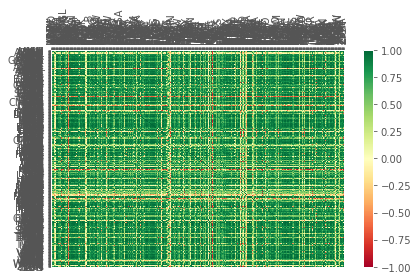

In [12]:
# Part 8: Correlation Tables & Data Visualization
# Visualizing data from the SP500 close price csv 
def visualize_data():
    df = pd.read_csv('sp500_joined_closes.csv')

# Example of plotting one company close price over time for Apple (ticker = AAPL) 
#    df['AAPL'].plot()
#    plt.show()

# Create correlation table for all data in df for SP500 close price
    df_corr = df.corr()
    print(df_corr.head())
# Visualize inner values of dataframe (numpy array of columns and rows)
# Specify figure and define axes using parameters(111) : one subplot is 1x1 for plot 1)
    data = df_corr.values
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)

# Define heatmap using a range from red to yellow to green
# Red = Negative, Yellow = Neutral, Green = Positive
# Colorbar for legend
    heatmap = ax.pcolor(data, cmap = plt.cm.RdYlGn)
    fig.colorbar(heatmap)
# Build graph
    ax.set_xticks(np.arange(data.shape[0]) + 0.5, minor = False)
    ax.set_yticks(np.arange(data.shape[1]) + 0.5, minor = False)
    ax.invert_yaxis()
    ax.xaxis.tick_top()

    column_labels = df_corr.columns
    row_labels = df_corr.index
# Make x labels vertical, set limit of colors (-1 = min, 1 = max)
    ax.set_xticklabels(column_labels)
    ax.set_yticklabels(row_labels)
    plt.xticks(rotation = 90)
    heatmap.set_clim(-1, 1)
    plt.tight_layout()
    plt.show()
visualize_data()

In [13]:
# Next create features/labels, use ML for trading strategy & possible investments.	

# Part 9: Preprocessing Data for Machine Learning (ML) Model
# Part 10: Setting Target
# Part 11: Generate Labels

# svm = support-vector machine
# Cross validation to shuffle data and create training & testing samples  
# Voting classifier - use many classifiers, let them voite on best classifier

# For tutorials on Practical Machine Learning with Python visit: /
# https://pythonprogramming.net/machine-learning-tutorial-python-introduction/

# Machine Learnings: Preprocess Data for Trading Strategy

# Disclaimer: This script is for educational purposes only.
# To build more accurate ML models, you might focus on specific time frames (i.e. 1-2 yrs)
# Further, you might need more data.
# We use one-day data because it is available for free.

# Create features/labels, use ML for trading strategy & possible investments.	
# Theory: groups of companies might move up/down together (using pricing data).
# Take S&P500 dataset (closing price over time, 2000-2020), use machine learning.
# Normalize dataset by converting pricing data to % change
# Features = define, labels = target
# Labels = Buy, Sell, or Hold

In [14]:
# Take feature data and determine label by asking:
# "Within next 7 trading days did price go up more than x% (i.e. 2%)?"
# If yes, sell company.
# If no, hold company.

# Each model generated per company
# Each company model considers pricing data from entire SP500 dataset
# To look further into the future, i.e. 30 days, change to "hm_days = 30:
def process_data_for_labels(ticker):
    hm_days = 7
    fileDataSet = pd.read_csv('sp500_joined_closes.csv', index_col = 0)
    tickers = fileDataSet.columns.values.tolist()
    fileDataSet.fillna(0, inplace = True)

# Preprocessing Data for ML

# The range will go up to a certain point (for 7 days)  
# Create custom dataset to predict future values based on percentage change
# Value in percent change = price in two days from now
# less today's price, divided by today's price, multiplied by 100.
    for i in range(1, hm_days+1):
        fileDataSet['{}d'.format(ticker, i)] = (fileDataSet[ticker].shift(-i) - fileDataSet[ticker]) / fileDataSet[ticker]

    fileDataSet.fillna(0, inplace = True)
    return tickers, fileDataSet

# Here we look at " " company (ticker = " ")
process_data_for_labels('BAC')

(['MMM',
  'ABT',
  'ABBV',
  'ABMD',
  'ACN',
  'ATVI',
  'ADBE',
  'AMD',
  'AAP',
  'AES',
  'AFL',
  'A',
  'APD',
  'AKAM',
  'ALK',
  'ALB',
  'ARE',
  'ALXN',
  'ALGN',
  'ALLE',
  'LNT',
  'ALL',
  'GOOGL',
  'GOOG',
  'MO',
  'AMZN',
  'AMCR',
  'AEE',
  'AAL',
  'AEP',
  'AXP',
  'AIG',
  'AMT',
  'AWK',
  'AMP',
  'ABC',
  'AME',
  'AMGN',
  'APH',
  'ADI',
  'ANSS',
  'ANTM',
  'AON',
  'AOS',
  'APA',
  'AIV',
  'AAPL',
  'AMAT',
  'APTV',
  'ADM',
  'ANET',
  'AJG',
  'AIZ',
  'T',
  'ATO',
  'ADSK',
  'ADP',
  'AZO',
  'AVB',
  'AVY',
  'BKR',
  'BLL',
  'BAC',
  'BK',
  'BAX',
  'BDX',
  'BRK.B',
  'BBY',
  'BIO',
  'BIIB',
  'BLK',
  'BA',
  'BKNG',
  'BWA',
  'BXP',
  'BSX',
  'BMY',
  'AVGO',
  'BR',
  'BF.B',
  'CHRW',
  'COG',
  'CDNS',
  'CPB',
  'COF',
  'CAH',
  'KMX',
  'CCL',
  'CARR',
  'CAT',
  'CBOE',
  'CBRE',
  'CDW',
  'CE',
  'CNC',
  'CNP',
  'CTL',
  'CERN',
  'CF',
  'SCHW',
  'CHTR',
  'CVX',
  'CMG',
  'CB',
  'CHD',
  'CI',
  'CINF',
  'CTAS',
  '

In [15]:
# Next, generate labels for targets using machine learning for investing with Python
# Based on percent change pricing information, should we buy, sell, or hold company?

# See mapping functions tutorials at https://pythonprogramming.net/python-function-mapping-pandas/
# Args and kwargs tutorials at https://pythonprogramming.net/args-kwargs-intermediate-python-tutorial/

# We will also back-test out strategy.
# Example here using percent change = 2% in a week.
# If company stock price changes by 2% in 7 days get out of position for that company.
# 0 = hold, -1 = sell, +1 = buy
# If data is inbalanced you can adjust the algorithm for higher accuracy
# Aiming for > 33% accuracy (for this example)
# Example if you are incorrect on the hold, did not think it would change more than 2%, but it did...

In [16]:
def buy_sell_hold(*args):
    cols = [c for c in args]
    requirement = 0.02
    for col in cols:
        if col > requirement:
            return 1
        if col < -requirement:
            return -1
    return 0

In [17]:
# Part 11 ML Labels
# Map the function above to a column
def extract_featuresets(ticker):
    tickers, fileDataSet = process_data_for_labels(ticker)

# Define new column, value = mapped function using arg
# Arg = 7-day & change for future price; Pass paramters to function
# Generate labels for buy, sell, or hold
    fileDataSet['{}_target'.format(ticker)] = list(map(buy_sell_hold, fileDataSet[[c for c in fileDataSet.columns if c not in tickers]].values))

    vals = fileDataSet['{}_target'.format(ticker)].values.tolist()
    str_vals = [str(i) for i in vals]
    print('Data spread:', Counter(str_vals))
    
# List of options
    fileDataSet.fillna(0, inplace = True)
    fileDataSet = fileDataSet.replace([np.inf, -np.inf], np.nan)
    fileDataSet.dropna(inplace = True)

# Normalizing data set for ticker (prices) by using percent change.
    fileDataSet_vals = fileDataSet[[ticker_name for ticker_name in tickers]].pct_change()
    fileDataSet_vals = fileDataSet_vals.replace([np.inf, -np.inf], 0)
    fileDataSet_vals.fillna(0, inplace = True)

    X = fileDataSet_vals.values
    y = fileDataSet['{}_target'.format(ticker)].values

    return X, y, fileDataSet

extract_featuresets('BAC')

Data spread: Counter({'0': 2026, '1': 1701, '-1': 1403})


(array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.0397349 , -0.0285716 ,  0.        , ...,  0.        ,
         -0.04842362,  0.        ],
        [ 0.02896518, -0.00183788,  0.        , ...,  0.        ,
         -0.00118324,  0.        ],
        ...,
        [ 0.00876118,  0.02119695, -0.00010959, ...,  0.0213796 ,
          0.06502401, -0.0074438 ],
        [-0.0161932 ,  0.00333004,  0.02006793, ..., -0.0363349 ,
         -0.01253218, -0.02257383],
        [ 0.00432072,  0.01194824, -0.00989033, ...,  0.01147542,
         -0.01757237, -0.00168803]]),
 array([-1,  1,  1, ...,  0,  0,  0], dtype=int64),
                    MMM        ABT       ABBV        ABMD         ACN  \
 Date                                                                   
 2000-01-03   28.311874   6.564564   0.000000   18.250000    0.000000   
 2000-01-04   27.186905   6.377004   0.000000   17.812500    0.000000   
 2000-01-05   27.974379   6.3

In [18]:
# Create new Machine Learning function
# Create training and testing, 25% sample data will be tested against for accuracy

# Create classifier, define
# X_train is (fileDataset_vals, above) the percent change data for all companies, including company testing for
# y is the target classification (0 = hold, 1 = buy, -1 = sell)
# Use classifier that will fit input data to target 
# clf = neighbors.KNeighborsClassifier()
#
#    clf.fit(X_train, y_train)
#    confidence = clf.score(X_test, y_test)
#    print('Accuracy', confidence)

# Going forward, if you train and do not wish to retrain this model (above) pickle the classifier
# Load the pickle file, clf.predict will run and return list of predictions
# predictions = clf.predict(X_test)
# print('Predicted spread:', Counter(predictions))
#
# print('Confidence:', Counter(confidence))   
#    return confidence

# Here we are looking at Bank of America (ticker = BAC)
# do_ml('BAC')

# Example Output: 0 = hold, -1 = sell, 1 = buy (for BAC we had more holds, followed by sells and least for buys)
# Data spread: Counter({'0': 2558, '1': 1462, '-1': 1110})
# Data spread: Counter({'0': 2026, '1': 1701, '-1': 1403})
# Accuracy 0.38347622759158223
# Predicted spread: Counter({0: 758, -1: 318, 1: 207})

In [19]:
# Part 12: ML Algorithm with Voting Classifier 
# Repeat above using Voting Classifier
def do_ml(ticker):
    X, y, fileDataSet = extract_featuresets(ticker)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
    #clf = neighbors.KNeighborsClassifier()
# Replace simple classifier with voting classifier:
# Voting classifier will take list of tuples of classifier by name, classifier
# List contains tuples (i.e. 3 classifiers: linear svc, neigbors, random forest classifiers) 
    #clf = VotingClassifier([('lsvc', svm.LinearSVC()),
    clf = VotingClassifier([('lsvc', LinearSVC()), 
                            ('knn', neighbors.KNeighborsClassifier()),
                            ('rfor', RandomForestClassifier())])

    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    print('Accuracy', confidence)
    predictions = clf.predict(X_test)
    print('Predicted spread:', Counter(predictions))

    return confidence

do_ml('BAC')

Data spread: Counter({'0': 2026, '1': 1701, '-1': 1403})


C:\Users\JCW\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy 0.4107560405300078
Predicted spread: Counter({0: 800, -1: 284, 1: 199})


0.4107560405300078